In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
import time
from tkinter import *

In [2]:
def make_cluster(x, y, c, s, num):
    
    for i in range(num):
        x.append(np.random.normal(loc=c[0], scale=s[0]))
        y.append(np.random.normal(loc=c[1], scale=s[1]))
        
    return None

In [3]:
def dist(a, b):
    return ((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2) ** (0.5)

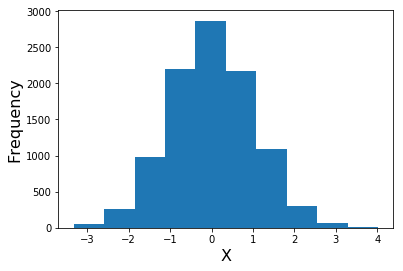

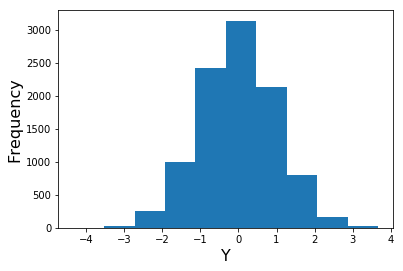

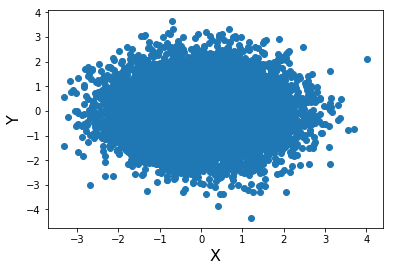

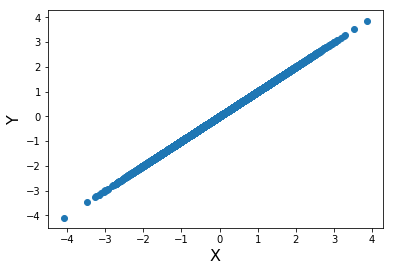

In [4]:
x = []
y = []
make_cluster(x, y, (0, 0), (1, 1), 10000)
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=16)
plt.hist(x)
plt.xlabel("X")
plt.ylabel("Frequency")
plt.show()
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.hist(y)
plt.show()
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
x = []
y = []
for i in range(10000):
    tmp = np.random.normal(0, 1, 1)
    x.append(tmp)
    y.append(tmp)
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

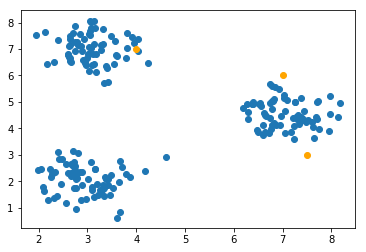

In [5]:
x=[]
y=[]
c_x = [4, 7.5, 7]
c_y = [7, 3, 6]
make_cluster(x, y, (3,2), (0.5, 0.5), 70)
make_cluster(x, y, (3,7), (0.5, 0.5), 70)
make_cluster(x, y, (7,4.5), (0.5, 0.5), 70)
plt.scatter(x, y)
plt.scatter(c_x, c_y, c="orange")

plt.show()

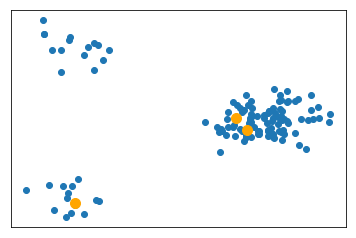

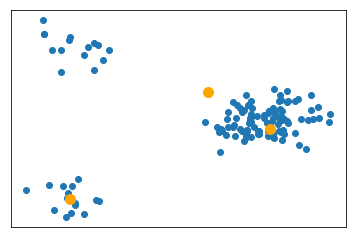

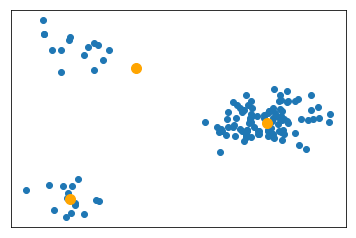

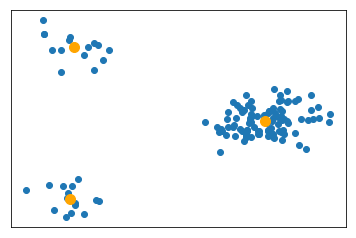

In [10]:
# Traditional k-means snapshots
c_x = []
c_y = []
c_x.append(x[0])
c_y.append(y[0])
c_x.append(x[80])
c_y.append(y[80])
c_x.append(x[90])
c_y.append(y[90])

all_x_centers = []
all_y_centers = []

center_x = copy.deepcopy(c_x)
center_y = copy.deepcopy(c_y)
old_centers_x = []
old_centers_y = []


while (not (set(center_x) == set(old_centers_x) and set(center_y) == set(old_centers_y))):
    
    all_x_centers.append(copy.deepcopy(center_x))
    all_y_centers.append(copy.deepcopy(center_y))
    
    old_centers_x = copy.deepcopy(center_x)
    old_centers_y = copy.deepcopy(center_y)
    
    plt.scatter(x, y)
    plt.scatter(center_x, center_y, c="orange", s=100)
    clusters = [[] for i in range(len(center_x))]
    for i in range(len(x)):
        closest = 0
        for j in range(len(center_x)):
            old_dist = dist((x[i], y[i]), (center_x[closest], center_y[closest]))
            new_dist = dist((x[i], y[i]), (center_x[j], center_y[j]))
            if  new_dist < old_dist:
                closest = j
        clusters[closest].append(i)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("k" + str(counter) + ".png")
    counter = counter + 1
    groups.append(copy.deepcopy(clusters))
    plt.show()
    
    for i in range(len(clusters)):
        new_x = 0
        new_y = 0
        for j in clusters[i]:
            new_x = new_x + x[j]
            new_y = new_y + y[j]
        center_x[i] = new_x * 1.0 / len(clusters[i])
        center_y[i] = new_y * 1.0 / len(clusters[i])

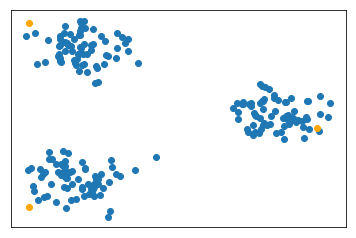

In [7]:
plt.scatter(x,y)
plt.scatter([2, 2, 7.9], [8, 1, 4], c="orange")
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
def distortion(index, lst, x, y):
    
    distance = 0
    
    for i in lst:
        distance = distance + dist((x[i], y[i]), (x[lst[index]], y[lst[index]]))
        
    return distance

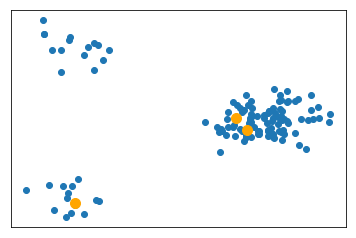

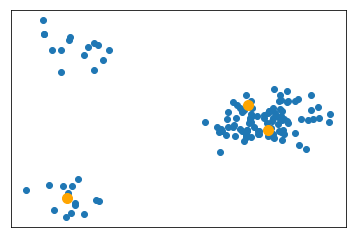

In [9]:
# Centroid constrained k-means
x = []
y = []
make_cluster(x, y, (3,2), (0.5, 0.5), 15)
make_cluster(x, y, (3,7), (0.5, 0.5), 15)
make_cluster(x, y, (7,4.5), (0.5, 0.5), 100)

c_x = []
c_y = []
c_x.append(x[0])
c_y.append(y[0])
c_x.append(x[80])
c_y.append(y[80])
c_x.append(x[90])
c_y.append(y[90])

all_x_centers = []
all_y_centers = []

center_x = copy.deepcopy(c_x)
center_y = copy.deepcopy(c_y)
old_centers_x = []
old_centers_y = []

groups = []

while (not (set(center_x) == set(old_centers_x) and set(center_y) == set(old_centers_y))):
    
    all_x_centers.append(copy.deepcopy(center_x))
    all_y_centers.append(copy.deepcopy(center_y))
    
    old_centers_x = copy.deepcopy(center_x)
    old_centers_y = copy.deepcopy(center_y)
    
    plt.scatter(x, y)
    plt.scatter(center_x, center_y, c="orange", s=100)
    clusters = [[] for i in range(len(center_x))]
    for i in range(len(x)):
        closest = 0
        for j in range(len(center_x)):
            old_dist = dist((x[i], y[i]), (center_x[closest], center_y[closest]))
            new_dist = dist((x[i], y[i]), (center_x[j], center_y[j]))
            if  new_dist < old_dist:
                closest = j
        clusters[closest].append(i)
    groups.append(copy.deepcopy(clusters))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    for i in range(len(clusters)):
        min_val = np.inf
        index = None
        for j in range(len(clusters[i])):
            tmp = distortion(j, clusters[i], x, y)
            if tmp < min_val:
                min_val = tmp
                index = j
        center_x[i] = x[clusters[i][index]]
        center_y[i] = y[clusters[i][index]]
